# CS 614 - Applications of Machine Learning
## Programming Assignment 5 - Word2Vec

In this assignment we'll play around with training a Word2Vec model

We will generally follow the following article/tutorial:
https://towardsdatascience.com/word2vec-with-pytorch-implementing-original-paper-2cd7040120b0/

### Create Our Data
First let's create our data.   Create a few sentences that have similar words in them.  Here's some to get you started...

In [ ]:
sentences = [
    "What is the best time to call you tomorrow",
    "What is the best hour to call you tomorrow",
    "I will call you at a good time tomorrow",
    "Tomorrow is a good day to meet",
    "The cat ate the fish for dinner",
    "The dog ate the meat for lunch",
    "I had fish and rice for dinner",
    "She had chicken and bread for lunch",
    "The cat sat on the mat",
    "The dog sat on the rug",
    "A happy cat is a good pet",
    "A happy dog is a great pet",
    "The weather is nice and sunny today",
    "The weather is cold and rainy today",
    "It is a beautiful warm day outside",
    "It is a terrible cold night outside",
    "She likes to eat good food every day",
    "He likes to cook great meals every night",
    "They enjoy a nice warm meal together",
    "We enjoy a good cold drink together",
    "The sun rises early in the morning",
    "The sun sets late in the evening",
    "Birds sing in the morning light",
    "Owls hoot in the quiet night",
    "I drink coffee every morning",
    "She drinks tea every evening",
    "He reads a book before bed",
    "They watch movies at night",
    "Children play in the park after school",
    "Parents walk their dogs in the park",
    "The baker makes fresh bread every day",
    "The chef cooks delicious meals every night",
    "We eat breakfast together on Sundays",
    "They eat dinner together on Fridays",
    "The train arrives at the station on time",
    "The bus leaves the station every hour",
    "Students study hard for their exams",
    "Teachers prepare lessons for their students",
    "The garden is full of blooming flowers",
    "The forest is full of tall trees",
    "Rain falls softly on the green grass",
    "Snow covers the ground in winter",
    "The river flows gently through the valley",
    "The mountain stands tall above the clouds",
    "She wears a warm coat in winter",
    "He wears a light shirt in summer",
    "The baby sleeps quietly in the crib",
    "The toddler plays happily with toys",
    "The old man walks slowly down the street",
    "The young girl runs quickly to school",
    "The store opens early in the morning",
    "The store closes late at night",
    "The movie starts at seven o'clock",
    "The concert ends at ten o'clock",
    "We celebrate birthdays with cake and gifts",
    "They celebrate holidays with family and friends",
    "The doctor helps sick patients get better",
    "The nurse cares for patients in the hospital",
    "The artist paints beautiful pictures",
    "The musician plays lovely music",
    "The writer tells interesting stories",
    "The actor performs on the big stage",
    "The farmer grows fresh vegetables",
    "The gardener plants colorful flowers",
    "The mechanic fixes broken cars",
    "The driver takes people to work",
    "The pilot flies the airplane safely",
    "The sailor steers the ship at sea",
    "The cook prepares tasty food",
    "The waiter serves food at the restaurant",
    "The librarian organizes books on the shelf",
    "The student borrows books from the library",
    "The dog barks loudly at strangers",
    "The cat purrs softly when happy",
    "The horse runs fast in the field",
    "The cow grazes quietly in the meadow",
    "The chicken lays eggs every morning",
    "The duck swims in the pond",
    "The fish swims in the aquarium",
    "The frog jumps into the water",
    "The bee collects nectar from flowers",
    "The butterfly lands on a leaf",
    "The squirrel climbs the tall tree",
    "The rabbit hops across the garden",
    "The fox hides in the bushes",
    "The wolf howls at the moon",
    "The bear sleeps during winter",
    "The deer runs through the forest",
    "The lion roars in the jungle",
    "The tiger hunts for food at night",
    "The elephant drinks water at the river",
    "The giraffe eats leaves from tall trees",
    "The zebra runs with the herd",
    "The monkey swings from branch to branch",
    "The parrot talks to people",
    "The peacock spreads its colorful feathers",
    "The penguin waddles on the ice",
    "The seal swims in the cold sea",
    "The whale sings deep in the ocean",
    "The dolphin jumps above the waves",
    "The cat loves to nap in the sun",
    "Every morning, the cat waits by the window",
    "A black cat crossed the road this morning",
    "The cat chases its tail after breakfast",
    "My cat enjoys warm food in winter",
    "The cat runs across the snowy yard in winter",
    "A hungry cat meows for food every morning",
    "The cat finds a cozy spot in winter",
    "The cat's fur keeps it warm in winter",
    "The cat pounces on its toy before food",
    "The cat stretches in the morning light",
    "A playful cat runs after a string",
    "The cat curls up by the fire in winter",
    "The cat eats its food quickly",
    "The cat greets me every morning",
    "The cat runs up the stairs for food",
    "The cat hides under the bed in winter",
    "The cat's favorite time is morning",
    "The cat waits for food at dawn",
    "The cat runs to the kitchen when it smells food",
    "Morning runs are refreshing in winter",
    "I eat my favorite food every morning",
    "The sun rises early in the winter morning",
    "A hot breakfast is the best food in the morning",
    "The cat purrs softly every morning",
    "Morning light fills the room in winter",
    "I see the cat outside every morning",
    "Morning is the best time for a run",
    "The cat stretches in the morning sun",
    "Morning food tastes better after a run",
    "The cat runs to greet me every morning",
    "Winter mornings are cold and quiet",
    "I feed the cat every morning in winter",
    "The cat loves morning food",
    "Morning runs help me wake up",
    "The cat sits by the window every morning",
    "A warm drink is perfect on a winter morning",
    "The cat's fur glows in the morning light",
    "Morning is when the cat is most playful",
    "I enjoy food with my cat every morning",
    "Food tastes better after a morning run",
    "The cat waits for food in the morning",
    "Winter food is warm and comforting",
    "The cat runs to its food bowl",
    "I prepare food for my cat every morning",
    "The smell of food wakes the cat in winter",
    "Food is served hot in winter mornings",
    "The cat enjoys its food after a run",
    "Morning food is the cat's favorite",
    "The cat eats food quickly in the morning",
    "Food is more delicious in winter",
    "The cat purrs after eating food",
    "I share my food with the cat in winter",
    "The cat runs to the table when it hears food",
    "Food brings the cat and me together every morning",
    "The cat's food bowl is always full in winter",
    "I buy special food for my cat in winter",
    "The cat meows for food every morning",
    "Food is the highlight of the cat's morning",
    "The cat finishes its food before going for a run",
    "The cat runs outside every morning",
    "Morning runs are fun with my cat",
    "The cat runs faster in winter",
    "I watch the cat as it runs for food",
    "The cat runs to the door when I come home",
    "Winter runs are chilly but exciting",
    "The cat runs around the house in the morning",
    "The cat runs to its food bowl in winter",
    "Morning runs help the cat stay healthy",
    "The cat runs up the tree in winter",
    "I take the cat for runs in the morning",
    "The cat runs after its toy before breakfast",
    "The cat runs to the window to see the snow",
    "The cat runs and jumps in the morning light",
    "Winter runs are the cat's favorite activity",
    "The cat runs to greet me every morning",
    "The cat runs in circles when it wants food",
    "The cat runs to the kitchen in winter",
    "Morning runs make the cat happy",
    "The cat runs to the warmest spot in winter",
    "The cat loves to sleep in winter",
    "Winter mornings are perfect for warm food",
    "The cat's fur is thick in winter",
    "I feed the cat extra food in winter",
    "The cat runs less in winter",
    "Winter food is the cat's favorite",
    "The cat finds a sunny spot in winter",
    "The cat's paws are cold in winter mornings",
    "I cuddle with the cat in winter",
    "The cat eats more food in winter",
    "Winter runs are short but fun",
    "The cat waits by the heater in winter",
    "The cat's food is always warm in winter",
    "The cat runs to the fireplace in winter",
    "Winter is the cat's nap season",
    "The cat enjoys morning sun in winter",
    "Food is more important in winter",
    "The cat's whiskers freeze in winter",
    "The cat runs to the window to watch the snow in winter",
    "Winter mornings are quiet with the cat",
    "The cat runs outside for food every winter morning",
    "Morning food is the cat's favorite in winter",
    "The cat runs to its food bowl every winter morning",
    "I watch the cat run in the snow every winter morning",
    "The cat enjoys food after a morning run in winter",
    "Winter mornings are best spent with the cat and good food",
    "The cat runs to the kitchen for food every winter morning",
    "Food is tastier after a winter morning run with the cat",
    "The cat purrs after eating food on a cold winter morning",
    "The cat's fur shines in the morning sun during winter",
    "The cat runs to greet me every winter morning",
    "I give the cat warm food every winter morning",
    "The cat's favorite time is a winter morning with food",
    "The cat runs to the window to watch the snow every morning in winter",
    "Food is the cat's reward after a winter morning run",
    "The cat curls up after a run in the winter morning",
    "The cat's food bowl is always full on winter mornings",
    "The cat runs to the fireplace after eating food in winter",
    "Winter mornings are peaceful with the cat and food",
    "The cat's morning runs are shorter in winter",
    "The cat finds food every morning in winter",
    "Morning runs with the cat are fun in winter",
    "The cat eats food after a run every winter morning",
    "I see the cat running for food every morning in winter",
    "The cat's food bowl is empty after a morning run in winter",
    "The cat runs to the door for food every winter morning",
    "Winter mornings are cold, but the cat still runs for food",
    "The cat's favorite food is served every winter morning",
    "The cat runs to the kitchen for breakfast every morning in winter",
    "Food is the cat's motivation for morning runs in winter",
    "The cat purrs after a morning run and food in winter",
    "The cat's fur is soft and warm in winter mornings",
    "The cat runs to the window to watch birds every winter morning",
    "The cat enjoys food and naps after a winter morning run",
    "The cat's morning runs are followed by food in winter",
    "The cat finds a warm spot after eating food in winter",
    "The cat runs to the heater after a morning run in winter",
    "The cat's food is always ready after a winter morning run",
    "The cat stretches before a morning run in winter",
    "The cat's favorite activity is running for food every winter morning",

### Pre-Processing Data
Next let's extract the following information from the sentences
1. Sentences
2. How many times each word occurs
3. And key index pair for each word
4. A reverse index key

We'll crudly *tokenize* our data by splitting using spaces.

In [10]:
import numpy as np
from collections import Counter

## just a little bit of preprocessing for our data, counting/ordering types

# Original code (removed last word from each sentence unnecessarily):
# data = {'sentences': [s for x in sentences
#                       for s in [(x).lower().split()]]}
# for i in range(len(data['sentences'])):
#     data['sentences'][i] = [e for i in data['sentences'][i] for e in [i]][:-1]

data = {'sentences': [x.lower().split() for x in sentences]}  #the sentences

data['counts'] = Counter([t for s in data['sentences'] for t in s]) #unique words and their counts
data['word2index'] = {t: i for i, t in enumerate(data['counts'])}  #indices for each word
data['index2word'] = {v: k for k, v in data['word2index'].items()}

print(data)
print(len(data['word2index']))

{'sentences': [['what', 'is', 'the', 'best', 'time', 'to', 'call', 'you', 'tomorrow'], ['what', 'is', 'the', 'best', 'hour', 'to', 'call', 'you', 'tomorrow'], ['i', 'will', 'call', 'you', 'at', 'a', 'good', 'time', 'tomorrow'], ['tomorrow', 'is', 'a', 'good', 'day', 'to', 'meet'], ['the', 'cat', 'ate', 'the', 'fish', 'for', 'dinner'], ['the', 'dog', 'ate', 'the', 'meat', 'for', 'lunch'], ['i', 'had', 'fish', 'and', 'rice', 'for', 'dinner'], ['she', 'had', 'chicken', 'and', 'bread', 'for', 'lunch'], ['the', 'cat', 'sat', 'on', 'the', 'mat'], ['the', 'dog', 'sat', 'on', 'the', 'rug'], ['a', 'happy', 'cat', 'is', 'a', 'good', 'pet'], ['a', 'happy', 'dog', 'is', 'a', 'great', 'pet'], ['the', 'weather', 'is', 'nice', 'and', 'sunny', 'today'], ['the', 'weather', 'is', 'cold', 'and', 'rainy', 'today'], ['it', 'is', 'a', 'beautiful', 'warm', 'day', 'outside'], ['it', 'is', 'a', 'terrible', 'cold', 'night', 'outside'], ['she', 'likes', 'to', 'eat', 'good', 'food', 'every', 'day'], ['he', 'likes

### Setting up our Training Data
To create our dataset we will loop through each sentence and:
1. With a moving window of odd integer size *WINDOW_SIZE*, loop through the sentence.
2. All middle words are the thing we want to predict ($y$)
3. All other words in the window are our context, and will be $x$

In [11]:
import torch
WINDOW_SIZE = 3 #TODO:  Play with this
half = WINDOW_SIZE//2
Xtrain = []
Ytrain = []

for s in data['sentences']:  #for each sentence
    for i in range(0,len(s)-WINDOW_SIZE+1): #for each word in sentence
        T = [data['word2index'][s[j]] for j in range(i,i+WINDOW_SIZE)]  #grab the word indices for the window
        Ytrain.append([T[half]])
        Xtrain.append(T[:half]+T[half+1:])

Xtrain = torch.tensor(Xtrain, dtype=torch.long)
Ytrain = torch.tensor(Ytrain, dtype=torch.long)

print(Xtrain.shape)
print(Ytrain.shape)

torch.Size([453, 2])
torch.Size([453, 1])


### Create Model
Our model will be quite simple:
1. Fully-connected layer to take us to our desired embedded dimension.
2. Another fully-connected layer to take us to the number of classes (potential words)

However, since we'll need to so some custom operations (summing over embedding in words of a sample), we'll create our own type of model (instead of just pre-made layers in a sequential model) so we can have more control over the forward (and backward) propagation.

In [12]:
from torch import nn
VOCAB_SIZE = len(data['counts'])
print("Vocabulary size: ", VOCAB_SIZE)
EMBED_DIMENSION = 300  #TODO:  Play with this

# Use Mac GPU if available
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

class CBOW_Model(nn.Module):
    def __init__(self, vocab_size, embed_dims):
        super().__init__()
        self.embedded_dim = embed_dims
        
        self.embeddings = nn.Linear(vocab_size, embed_dims)
        self.linear = nn.Linear(
            in_features=embed_dims,
            out_features=vocab_size,
        )
        
    def forward(self, inputs_):
        x = torch.zeros(inputs_.shape[0],inputs_.shape[1],self.embedded_dim, device=inputs_.device)  #shape of output.  (samples x items in sample x embedded dims)
        
        for i in range(inputs_.shape[0]):  #for each training sample
            x[i] = self.embeddings(inputs_[i])  #get its embeddings for the words in the sample
        
        x = x.mean(axis=1)  #take the average embedding
        x = self.linear(x)   #predict
        return x

model = CBOW_Model(VOCAB_SIZE, EMBED_DIMENSION).to(device)

Vocabulary size:  311
Using device: mps


### Train
Now time for our world-famous training loop!

Training time: 55.54 seconds


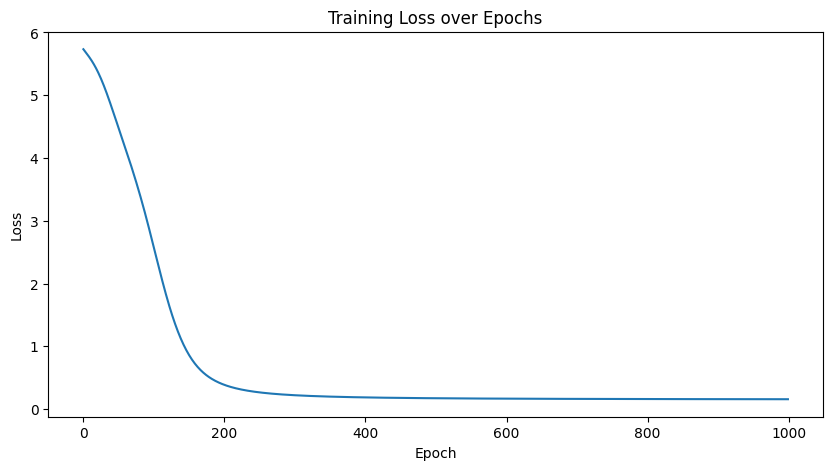

In [13]:
import time
MAX_EPOCHS = 1000  # TODO: Play with this

# Choose your loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model.train()
running_loss = []

XOneHot = torch.nn.functional.one_hot(Xtrain, num_classes=VOCAB_SIZE).to(torch.float).to(device)
YtrainGPU = Ytrain.squeeze().to(device)

start_time = time.time()  # Start timing

for epoch in range(MAX_EPOCHS):
    optimizer.zero_grad()
    outputs = model(XOneHot)

    loss = loss_fn(outputs, YtrainGPU)
    loss.backward()
    optimizer.step()

    running_loss.append(loss.item())

end_time = time.time()  # End timing
print(f"Training time: {end_time - start_time:.2f} seconds")

# Visualize the training process
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(running_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()

### Find Similar Words
Now for some fun.  Let's find similar words!

To do this, we'll get the embeddings for all our words, make them unit length, the compare each by taking their dot product.  This is often known as the *cosine similarity*

In [14]:
weights = list(model.parameters())[0].cpu().detach().numpy().T   #Get the weights from the embedded layer
print(weights.shape)
ids = torch.nn.functional.one_hot(torch.arange(VOCAB_SIZE))  #The indices of all the words
embeddings = ids@weights  # The embeddings of the words
print(embeddings.shape)

# normalization
norms = (embeddings ** 2).sum(axis=1) ** (1 / 2) + 10**(-10)
norms = np.reshape(norms, (len(norms), 1))
embeddings_norm = embeddings / norms


#This function takes a word (as a string), gets its embedding, compares to all other embeddings via cosine similarity.
#Then returns the topN
def get_top_similar(word: str, topN: int = 10):
    try:
        word_id = data['word2index'][word]   #This word's ID
    except:
        print("Out of vocabulary word")
        return

    word_vec = embeddings_norm[word_id]   #This word's normalized embedding
        
    word_vec = np.reshape(word_vec, (len(word_vec), 1))
    dists = np.matmul(embeddings_norm, word_vec).flatten()  #Dot product with all the other embeddings
    topN_ids = np.argsort(-dists)[1 : topN + 1]  #Sort by most similar

    topN_dict = {}
    for sim_word_id in topN_ids:
        sim_word = data['index2word'][sim_word_id.item()]
        topN_dict[sim_word] = dists[sim_word_id]
    return topN_dict

# Test with 5 different words
my_words = ["cat", "morning", "food", "runs", "winter"]

for myword in my_words:
    print(f"\nTop similar words to '{myword}':")
    print("-" * 30)
    try:
        for word, sim in get_top_similar(myword).items():
            print("{}: {:.3f}".format(word, sim))
    except:
        print("Word doesn't exist")

(311, 300)
torch.Size([311, 300])

Top similar words to 'cat':
------------------------------
dog: 0.891
weather: 0.453
it: 0.412
what: 0.403
full: 0.335
garden: 0.309
forest: 0.287
tomorrow: 0.242
on: 0.164
softly: 0.146

Top similar words to 'morning':
------------------------------
evening: 0.957
aquarium: 0.764
crib: 0.758
bushes: 0.755
ocean: 0.750
pond: 0.750
jungle: 0.749
field: 0.748
quiet: 0.748
hospital: 0.747

Top similar words to 'food':
------------------------------
seven: 0.624
ten: 0.623
strangers: 0.620
water: 0.617
ship: 0.534
howls: 0.500
arrives: 0.500
night: 0.407
movies: 0.384
morning: 0.382

Top similar words to 'runs':
------------------------------
toys: 0.460
cake: 0.411
gently: 0.402
family: 0.401
happily: 0.342
birthdays: 0.324
holidays: 0.318
young: 0.255
parents: 0.169
falls: 0.147

Top similar words to 'winter':
------------------------------
play: 0.765
sing: 0.764
hoot: 0.763
dogs: 0.673
summer: 0.665
fast: 0.617
quietly: 0.597
deep: 0.581
swims: 0.558


/var/folders/2q/m9zz4csj0rs2lyfr3_09l1wc0000gn/T/ipykernel_93935/2786220514.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  embeddings = ids@weights  # The embeddings of the words
/var/folders/2q/m9zz4csj0rs2lyfr3_09l1wc0000gn/T/ipykernel_93935/2786220514.py:25: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  dists = np.matmul(embeddings_norm, word_vec).flatten()  #Dot product with all the other embeddings
